In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('HR_comma_sep.csv', index_col=None)

In [4]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Use the following code to rename certain columns for better readability.**

In [6]:
df = df.rename(columns={'satisfaction_level': 'satisfaction','last_evaluation': 'evaluation',
'number_project': 'projectCount','average_montly_hours': 'averageMonthlyHours',
'time_spend_company': 'yearsAtCompany','Work_accident': 'workAccident',
'promotion_last_5years': 'promotion','sales' : 'department','left' : 'turnover'})
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**move the turnover column to the front of the table.**

In [7]:
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0,'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [8]:
print(df.shape)
print(df.dtypes)
df.describe()

(14999, 10)
turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [9]:
#How many rows and column contain in the dataset?
#(14999, 10)
#What is the mean of satisfaction values?
# - 0.612834
#What is the maximum value of yearsAtCompany?
# - 10
#What is the standard deviation value of averageMonthlyHours?
# - 49.943099

In [10]:
turnover_rate = df.turnover.value_counts()/len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [11]:
#What is the meaning of the output?
# - the non-turnover with 76.1917% 
#Now, let’s explore the overview of turnover vs non-turnover in terms of the mean value of each feature.
# - the turnover with 23.8083%

In [12]:
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [13]:
#What is the meaning of the output?
# - It group by turnover data and show the mean of the turnover which the mean of 0 and 1.

**Use the following code to draw a correlation matrix and heatmap:**

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


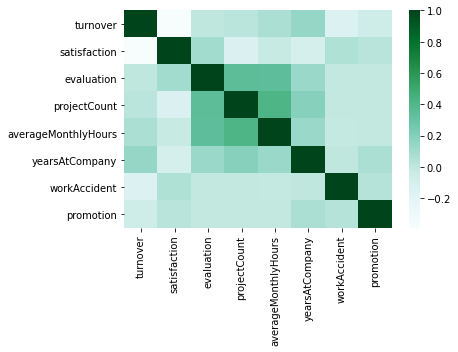

In [15]:
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap="BuGn")
corr

In [17]:
#What is the meaning of the output?
#- According to the graph, it arrange the value with green color and it compare between the 2 data.
#What is the different between positive and negative numbers?
#- If data is a positive number it means correlate each other but if data is a negative number it means not correlate each other.
#What features affect our target variable the most (turnover)?
#- Satisfaction
#What features have strong correlations with each other?
#- AverageMonthlyHours

**Use the following code to draw a diagram showing the analysis between salary and turnover rate to answer the following questions.**

'Employee Salary Turnover Distribution'

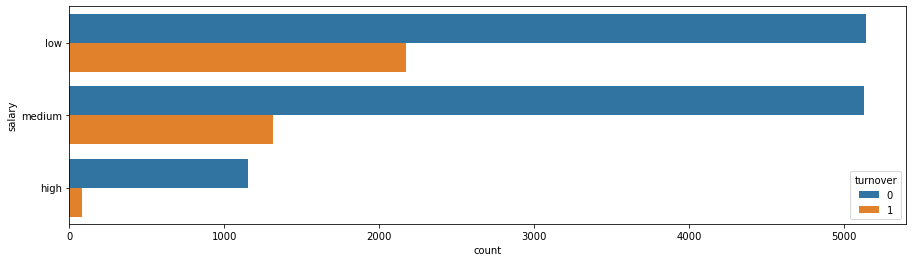

In [25]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title 
('Employee Salary Turnover Distribution')

In [26]:
#Which salary level is the majority of employees who left the company?
# - Low level has the most turnover.
#Are there any high salary employee left the company?
# - Yes there are high salary left.

**Department V.S. Turnover**
**Let’s see more information about the departments and answer the questions.**

'Employee Department Turnover Distribution'

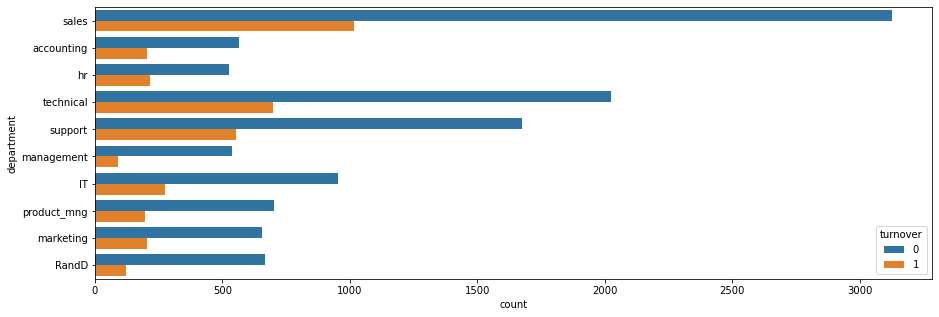

In [27]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title
('Employee Department Turnover Distribution')

**Turnover V.S. ProjectCount**

[Text(0, 0.5, 'Percent')]

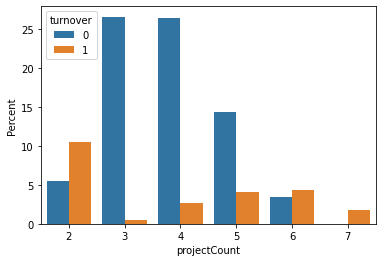

In [28]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data = df, estimator = lambda x: len(x)/len(df) *100)
ax.set(ylabel="Percent")

**Turnover V.S. Evaluation**

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. NoTurnover')

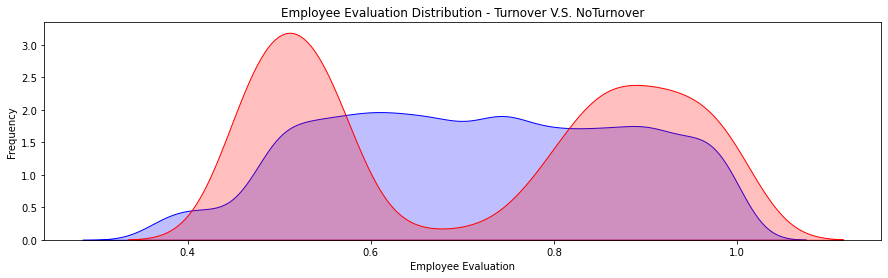

In [29]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] ,
color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] ,
color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. NoTurnover')

In [30]:
#Which evaluation level of employees tend to leave the company?
# - 0.4-0.6 and 0.8-1.0